# BMI 203: Step 2: Make Your Autoencoder

This Jupyter notebook trains a 64x16x64 autoencoder on the digits dataset.

#### Import modules.

In [40]:
from nn import nn, preprocess, io
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

Initialize seed for consistent results.

In [30]:
seed = 15

#### Load digits dataset.

In [7]:
digits_dataset = load_digits()
digits_dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [10]:
digits_arr = digits_dataset['data']
digits_arr

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
np.shape(digits_arr)

(1797, 64)

There are 1797 8x8 (64 pixels total) images, where each image is hand-written digit.

#### Split data into training and validation sets.

Split the data into 75% training, and 25% testing sets.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits_arr, digits_arr, test_size = 0.25, random_state = 0)

In [17]:
np.shape(X_train)

(1347, 64)

In [16]:
np.shape(X_test)

(450, 64)

In [28]:
X_train[:3]

array([[ 0.,  3., 13., 16.,  9.,  0.,  0.,  0.,  0., 10., 15., 13., 15.,
         2.,  0.,  0.,  0., 15.,  4.,  4., 16.,  1.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,
         0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 13.,
         8., 10.,  9.,  1.,  0.,  2., 16., 16., 14., 12.,  9.,  1.],
       [ 0.,  0.,  1., 14., 13.,  4.,  0.,  0.,  0.,  3., 15., 12., 11.,
        15.,  0.,  0.,  0.,  8., 11.,  1.,  7., 13.,  0.,  0.,  0.,  1.,
        13., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14., 13., 14.,  2.,
         0.,  0.,  0.,  2., 12.,  0.,  9.,  8.,  0.,  0.,  0.,  3., 13.,
         4., 12.,  6.,  0.,  0.,  0.,  0.,  9., 14., 13.,  1.,  0.],
       [ 0.,  0.,  4., 10., 13.,  6.,  0.,  0.,  0.,  1., 16., 14., 12.,
        16.,  3.,  0.,  0.,  4., 16.,  6.,  3., 16.,  4.,  0.,  0.,  0.,
        12., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  

In [29]:
y_train[:3]

array([[ 0.,  3., 13., 16.,  9.,  0.,  0.,  0.,  0., 10., 15., 13., 15.,
         2.,  0.,  0.,  0., 15.,  4.,  4., 16.,  1.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,
         0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 13.,
         8., 10.,  9.,  1.,  0.,  2., 16., 16., 14., 12.,  9.,  1.],
       [ 0.,  0.,  1., 14., 13.,  4.,  0.,  0.,  0.,  3., 15., 12., 11.,
        15.,  0.,  0.,  0.,  8., 11.,  1.,  7., 13.,  0.,  0.,  0.,  1.,
        13., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14., 13., 14.,  2.,
         0.,  0.,  0.,  2., 12.,  0.,  9.,  8.,  0.,  0.,  0.,  3., 13.,
         4., 12.,  6.,  0.,  0.,  0.,  0.,  9., 14., 13.,  1.,  0.],
       [ 0.,  0.,  4., 10., 13.,  6.,  0.,  0.,  0.,  1., 16., 14., 12.,
        16.,  3.,  0.,  0.,  4., 16.,  6.,  3., 16.,  4.,  0.,  0.,  0.,
        12., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  

#### Determine best hyperparameters.

I generate my autoencoder using ReLu as the activation function and MSE as the loss function since the output is not binary and the task is akin to linear regression. Here I test a series of hyperparameters in my autoencoder to determined the optimal learning rate, batch size, and number of epochs. The architecture of my autoencoder has 3 layers total (input layer, hidden layer, and output layer), which takes an input and encodes it into a lower-dimensional latent space to decode and reconstruct it. This means my neural network should be 64x16x64.

In [50]:
# Initialize nn architecture.
nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
           {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}]

# Create series of hyperparameters to test.
lrs = [0.1, 0.01, 0.001, 0.0001, 0.00001]
batch_sizes = [10, 25, 50, 100, 200]
epochs = [10, 25, 50, 100, 200, 500]

# Initialize list losses and parameters test runs.
losses = []
test_runs = []

# Test hyperparameters in series.
for lr in lrs:
    for bs in batch_sizes:
        for e in epochs:
            # Generate autoenconder with current hyperparameters.
            test_autoencoder = nn.NeuralNetwork(nn_arch,
                                                 lr = lr, 
                                                 batch_size = bs,
                                                 epochs = e,
                                                 seed = seed,
                                                 loss_function = "mse")
            loss_train, loss_val = test_autoencoder.fit(X_train, y_train, X_test, y_test) # Train autoencoder.
            min_loss = min(loss_val) # Add minimal loss value to store best final model.
            test_runs.append([lr, bs, e, min_loss]) # Append list of hyperparameters and loss to full list.

Fit v1.1
Fit v1.1
Fit v1.1
Fit v1.1
Fit v1.1
Fit v1.1
Fit v1.1
Fit v1.1


In [51]:
test_runs

[[0.1, 10, 10, 59.07433618258146],
 [0.1, 10, 500, 59.07433618258146],
 [0.1, 200, 10, 57.75538569267925],
 [0.1, 200, 500, 57.75538569267925],
 [0.01, 10, 10, 59.07433618258146],
 [0.01, 10, 500, 59.07433618258146],
 [0.01, 200, 10, 55.70946212879729],
 [0.01, 200, 500, 55.70946212879729]]

In [41]:
# Convert list of potential optimal hyperparameters to dataframe for easy viewing.
optimal_df = pd.DataFrame(optimal)
optimal_df.columns = ['Learning Rate', 'Batch Size', 'Epochs', 'Validation MSE']
optimal_df.sort_values('Validation MSE').tail(5)

,Learning Rate,Batch Size,Epochs,Validation MSE
51,0.01000,100,100,55.259102
52,0.01000,100,200,55.259102
53,0.01000,100,500,55.259102
55,0.01000,200,25,55.259102
149,0.00001,200,500,55.259102


In [62]:
def plot_losses(loss_train, loss_val):
    plt.plot(loss_train, label='Training Loss')
    plt.plot(loss_val, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.show()

In [61]:
# Visualize why error is so bad.
autoencoder = nn.NeuralNetwork(nn_arch, lr = 0.01, seed = seed, batch_size = 100, epochs = 500, loss_function = "mse")
loss_train, loss_val = autoencoder.fit(X_train, y_train, X_test, y_test)

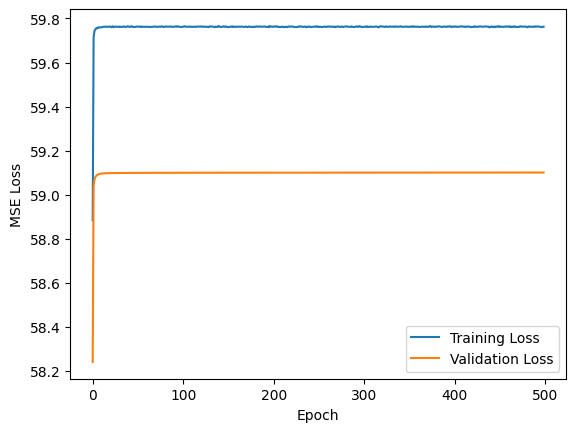

In [63]:
plot_losses(loss_train, loss_val)

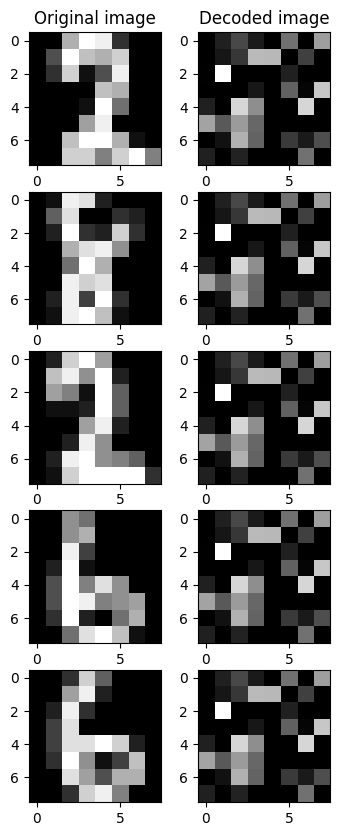

In [74]:
# Compare autoencoding to original images visually.
image, axis = plt.subplots(5,2, figsize=(4,10))
axis[0,0].set_title('Original image')
axis[0,1].set_title('Decoded image')

for row, digit in enumerate(X_test[:5]):
    axis[row, 0].imshow(digit.reshape((8,8)), cmap=plt.get_cmap('gray'))
    axis[row, 1].imshow(autoencoder.predict(digit).reshape((8,8)), cmap=plt.get_cmap('gray'))

plt.show()